# Importing Packages

In [312]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy.ndimage.interpolation import shift
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# Importing  and Filtering the Data
## Training Data

In [313]:
dt_parse = lambda dates: dt.strptime(dates, '%Y-%m-%d %H:%M:%S')

data = pd.read_csv('data/transformed/Simples_Geração_de_Energia_Dia_data_nordeste.csv',
                   header=0, names=['index','value', 'date'], parse_dates=True, index_col='index', date_parser=dt_parse)
data['value'] = data['value'].astype(float)
data['date'] = data['date'].astype('datetime64')
data = data[data['value'] > 0.0]
data['year']  = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day']   = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['weekday'] = data['date'].dt.weekday
data.head()

,value,date,year,month,day,hour,weekday
index,,,,,,,
2000-01-01 00:00:00,5350.7,2000-01-01 00:00:00,2000,1,1,0,5
2000-01-01 01:00:00,5190.9,2000-01-01 01:00:00,2000,1,1,1,5
2000-01-01 02:00:00,5069.5,2000-01-01 02:00:00,2000,1,1,2,5
2000-01-01 03:00:00,4895.0,2000-01-01 03:00:00,2000,1,1,3,5
2000-01-01 04:00:00,4780.6,2000-01-01 04:00:00,2000,1,1,4,5


## Value over times

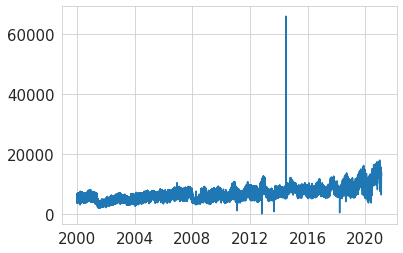

In [314]:
plt.plot(data['value'])

## Value over times in log with movel media

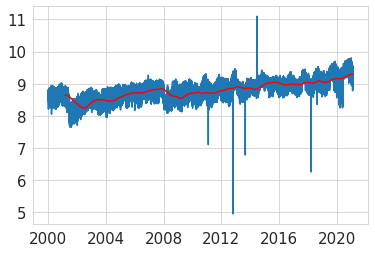

In [315]:
v_log = np.log(data['value'])
avg = v_log.rolling(10000).mean()
plt.plot(v_log)
plt.plot(avg, color='red')

## Test Data with one hundred first values

<AxesSubplot:ylabel='Density'>

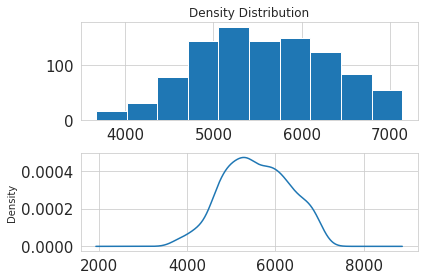

In [316]:
value = data['value'].head(1000)
plt.figure(tight_layout=True)
plt.subplot(211)
value.hist()
plt.title('Density Distribution')
plt.subplot(212)
value.plot(kind='kde')

## Test Data with all values with another form

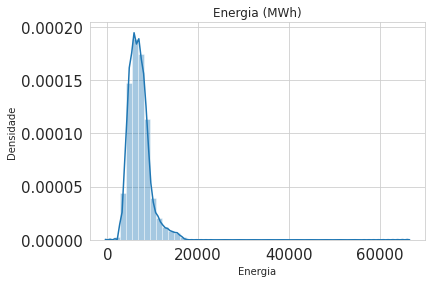

In [317]:
ax = sns.distplot(data['value'], kde=True)
ax.set(xlabel= 'Energia', ylabel='Densidade', title='Energia (MWh)')
plt.show()

## Histogram

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

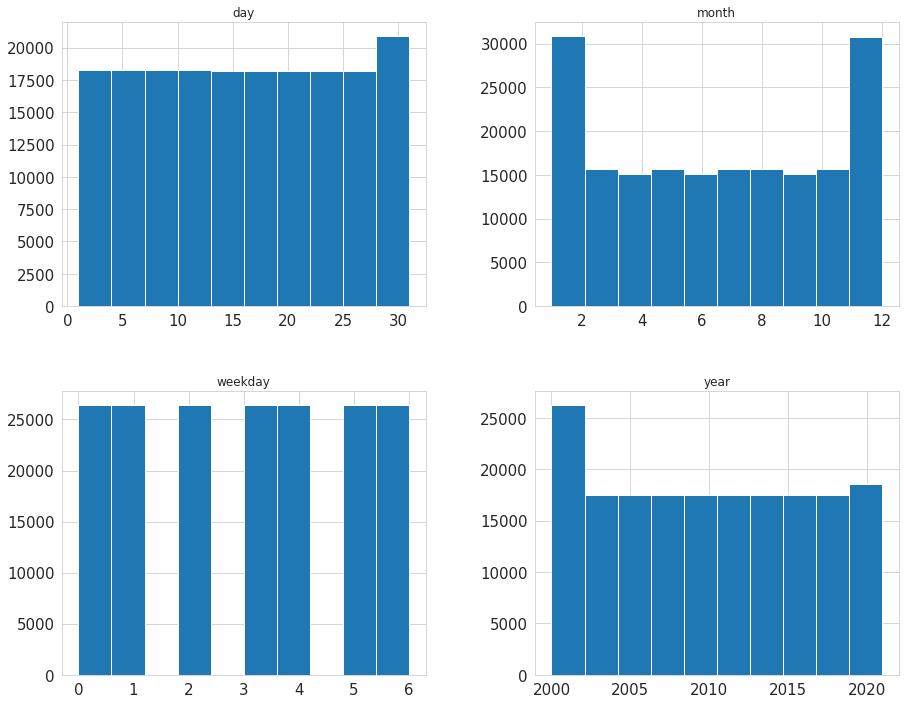

In [318]:
data.hist(grid=True, figsize=(15,12), column=['day', 'weekday', 'month', 'year'])

## Box-plot

<AxesSubplot:title={'center':'value'}, xlabel='year'>

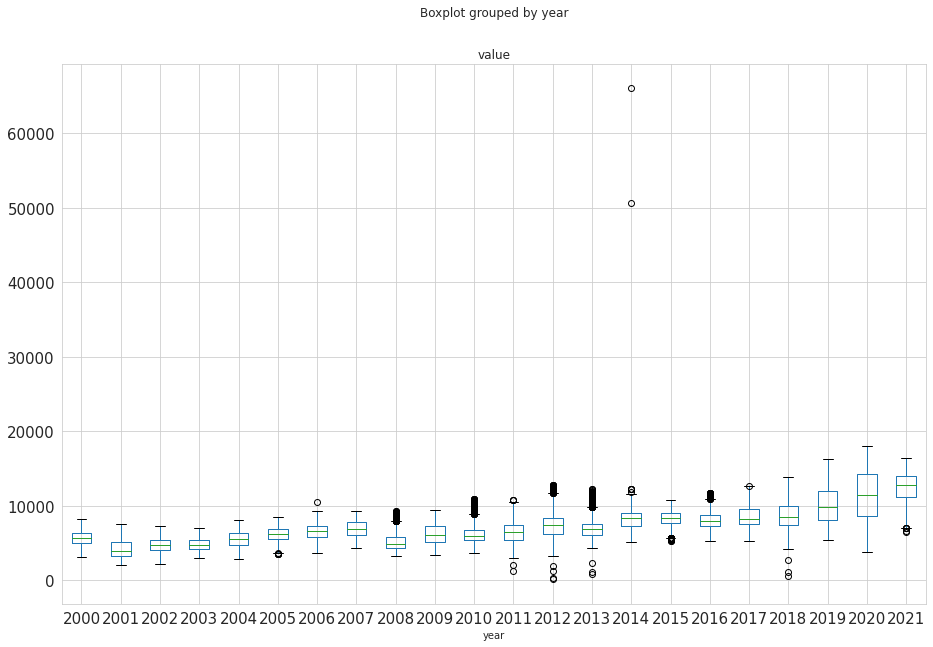

In [319]:
data.boxplot(figsize=(15,10), by='year', column='value')